In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\bhardwaj'

In [4]:
os.chdir('C:\\Users\\bhardwaj\\Desktop')

In [5]:
new_yrk1 = pd.read_csv("AB_NYC_2019.csv")

In [6]:
from pandas import Series as DataFrame

In [7]:
new_yrk1.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [8]:
ny_data = new_yrk1.drop(['id','name','host_id','host_name','neighbourhood','last_review'],axis = 1)

In [9]:
ny_data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
ny_data.shape

(48895, 10)

In [11]:
#missing value treatment
ny_data.isnull().sum()

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
# mean imputation
ny_data['reviews_per_month'] = ny_data['reviews_per_month'].fillna(1.373221)

In [13]:
ny_data.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
##outlier treatment and detection 
import matplotlib.pyplot  as plt


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AAEB0DDD30>]],
      dtype=object)

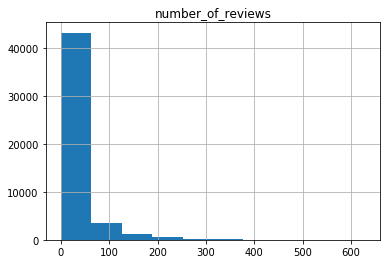

In [20]:
# visualize the data
ny_data.hist(column='number_of_reviews')

In [21]:
ny_data.dtypes

neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [25]:
ny_data['neighbourhood_group'] = ny_data['neighbourhood_group'].astype('category')

In [26]:
ny_data['room_type'] = ny_data['room_type'].astype('category')

In [27]:
ny_data.dtypes

neighbourhood_group               category
latitude                           float64
longitude                          float64
room_type                         category
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
dtype: object

In [28]:
ny_data.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [32]:
ny_data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [37]:
ny_data['neighbourhood_group'] = ny_data.astype('str')

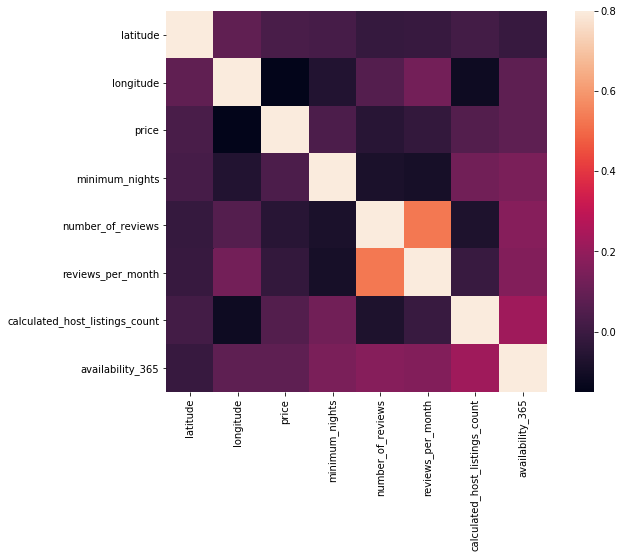

In [39]:
# correlation matrix
import seaborn as sns
corrmatrix = ny_data.corr()
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corrmatrix, vmax=0.8, square=True)

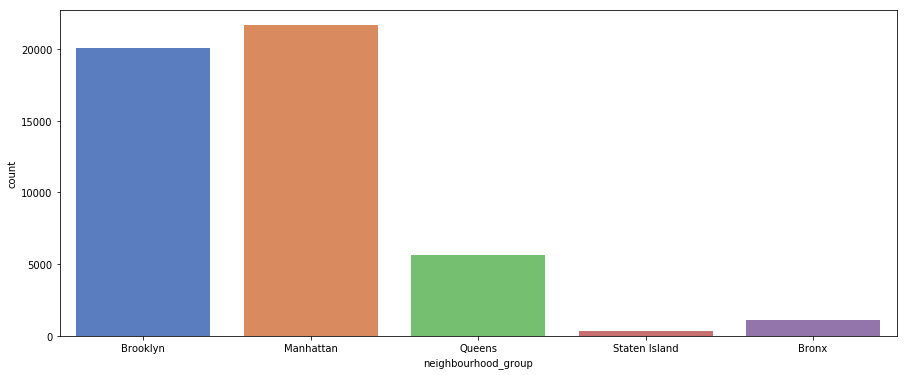

In [44]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(ny_data.neighbourhood_group,palette="muted")
plt.show()

In [46]:
def func(x):
    if 0 < x <= 155:
        return 'low'
    elif 156 < x <= 10000:
        return 'high'

ny_data['vprice'] = ny_data['price'].apply(func)

In [48]:
nyrk = ny_data.drop(['price'],axis = 1)

In [49]:
nyrk.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,vprice
0,Brooklyn,40.64749,-73.97237,Private room,1,9,0.210000,6,365,low
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,45,0.380000,2,355,high
2,Manhattan,40.80902,-73.94190,Private room,3,0,1.373221,1,365,low
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,270,4.640000,1,194,low
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,9,0.100000,1,0,low


In [50]:
nyrk2 = pd.get_dummies(nyrk,columns=['vprice'])

In [65]:
nyrk3 = pd.get_dummies(nyrk2,columns=['neighbourhood_group','room_type'])

In [66]:
nyrk3.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,vprice_high,vprice_low,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,1,9,0.210000,6,365,0,1,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,1,45,0.380000,2,355,1,0,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,3,0,1.373221,1,365,0,1,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,1,270,4.640000,1,194,0,1,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,10,9,0.100000,1,0,0,1,0,0,1,0,0,1,0,0


In [52]:
## modelling the data 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [67]:
list(nyrk3.columns) 

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'vprice_high',
 'vprice_low',
 'neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room']

In [68]:
nyrk3.dtypes

latitude                             float64
longitude                            float64
minimum_nights                         int64
number_of_reviews                      int64
reviews_per_month                    float64
calculated_host_listings_count         int64
availability_365                       int64
vprice_high                            uint8
vprice_low                             uint8
neighbourhood_group_Bronx              uint8
neighbourhood_group_Brooklyn           uint8
neighbourhood_group_Manhattan          uint8
neighbourhood_group_Queens             uint8
neighbourhood_group_Staten Island      uint8
room_type_Entire home/apt              uint8
room_type_Private room                 uint8
room_type_Shared room                  uint8
dtype: object

In [69]:
# split the data set in to feature and target variables
feature_cols = ['neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'latitude',
 'longitude',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']
target_cols = ['vprice_high',
 'vprice_low']
x = nyrk3[feature_cols] # independent variable 
y = nyrk3[target_cols] # dependent variable


In [70]:
# splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [71]:
# Create Decision Tree classifer object
dit = DecisionTreeClassifier()

# Train Decision Tree Classifer
dit = dit.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = dit.predict(x_test)

In [72]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7682186924807417


In [73]:
!pip install graphviz

In [74]:
! pip install pydotplus

In [75]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.133241 to fit



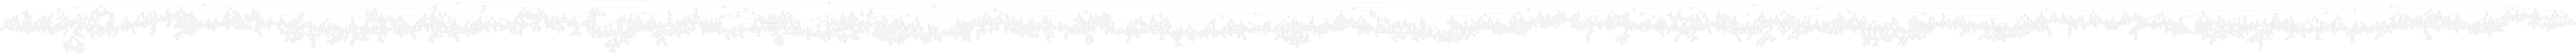

In [76]:
from IPython.display import Image  
from sklearn import tree
import pydotplus # installing pyparsing maybe needed
...

dot_data = tree.export_graphviz(dit, out_file=None, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [77]:
# Create Decision Tree classifer object
det = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)

# Train Decision Tree Classifer
det = det.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = det.predict(x_test)

In [81]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7961687913286523


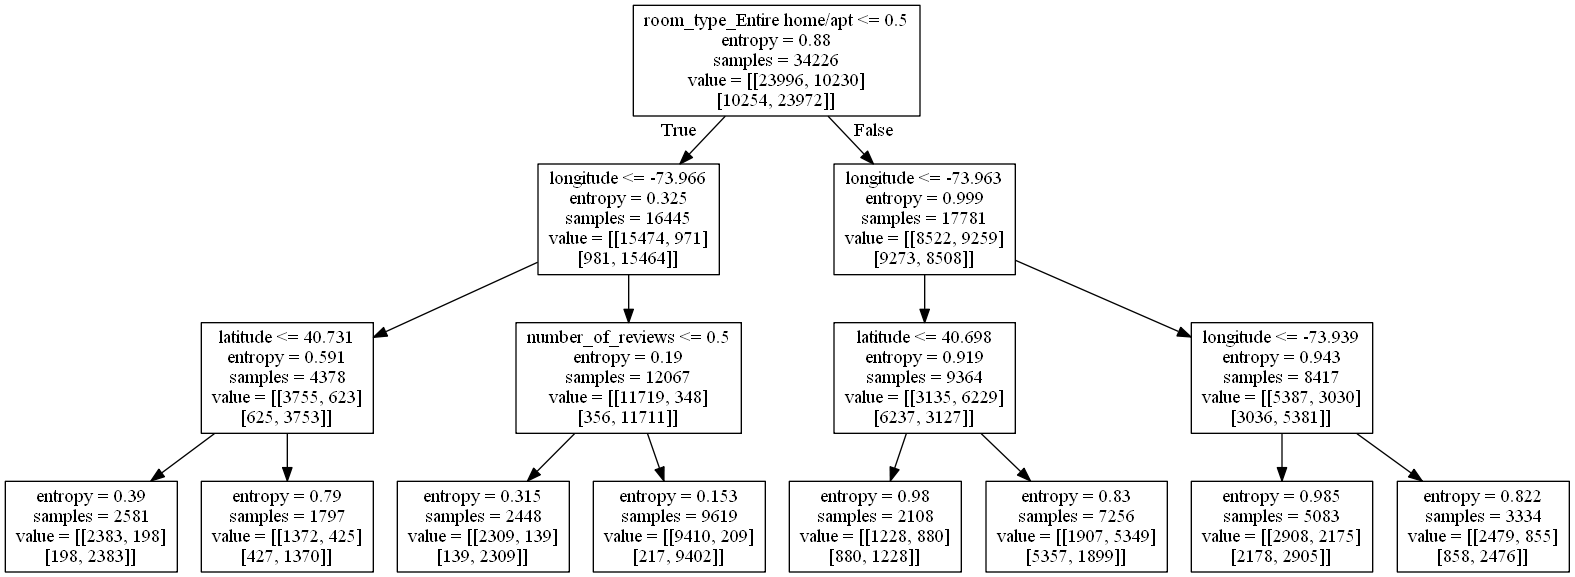

In [82]:
from IPython.display import Image  
from sklearn import tree
import pydotplus # installing pyparsing maybe needed
...

dot_data = tree.export_graphviz(det, out_file=None, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))        

              precision    recall  f1-score   support

           0       0.73      0.51      0.60      4390
           1       0.81      0.92      0.86     10271

   micro avg       0.80      0.80      0.80     14661
   macro avg       0.77      0.71      0.73     14661
weighted avg       0.79      0.80      0.78     14661
 samples avg       0.80      0.80      0.80     14661



C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(
    y_test.values.argmax(axis=1), y_pred.argmax(axis=1))


array([[2224, 2174],
       [ 814, 9457]], dtype=int64)

In [91]:
#matrix score
score = (2224+9457)/(2224+2174+814+9457)

In [92]:
print(score)

0.7963051332742518


In [94]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.7132160691729792
